# Assignment 4 (15 points)

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. 

Use python 3.
Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de (cc to wayne@uni-koblenz.de) until 5.7.2017 (midnight CET). 
Subject of email: "CSS2017 Ass4"
Filename: firstname_lastname_ass4.ipynb




### Simple Contagion: SIR Model (5 points)

Create 3 different network topologies (checkout different network generators [1]) and spread a disease in these networks using the SIR model (which you have to implement yourself; dont use packages like nepidemix). Compare your results with the results from spreading the disease in a fully connected ndtwork.
How do the different network topolgies impact the results?

At the beginning all nodes are susceptible and one randomly picked node is infected.
Choose different infection probabilities and death probabilities.
Plot the proportion of nodes in each state after k steps. 


[1] https://networkx.github.io/documentation/development/reference/generators.html



In [1]:
class GraphState:
    def __init__(self):       
        self.infected = 1
        self.susceptible = 0
        self.removed = 0   

In [82]:
# %pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as NX
import random as RD

import numpy as np
from numpy.random import choice

import time
from collections import defaultdict
import copy


def init_fully_connected_network(n): 
    global g
    g = NX.random_regular_graph(n-1, n) 
    init_network_state()
    
def init_small_world(n, k, p): 
    global g
    g = NX.watts_strogatz_graph(n, k, p) 
    init_network_state()
       
def init_random_network(n, p): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.erdos_renyi_graph(n, p)
    init_network_state()

def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"

    # select one node randomly and infect it    
    random_node_id = RD.choice(g.nodes())
    g.node[random_node_id]["state"] = "infected"
  
    


def draw():
    #PL.cla()
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        elif g.node[nd]["state"] == "removed":
            colors[nd] = "green"
        else:                       # Susceptible
            colors[nd] = "blue"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

    
def stepSIR(gs):
    global g
    for node in g.nodes():
        if g.node[node]["state"] == "infected":
            for nod in g.neighbors(node):
                if g.node[nod]['state'] == "susceptible" and infect():
                    g.node[nod]['state'] = "infected"
                    gs.infected+=1
                    gs.susceptible-=1
            if removed():
                g.node[node]["state"] = "removed"
                gs.infected-=1
                gs.removed+=1
                        
def runSIR(iterations):
    global g
    gs = GraphState()
    gs.infected = 1
    gs.susceptible = len(g.nodes())
    gs.removed = 0
    num_iter = 0
    infected_ = [gs.infected]
    susceptible_ = [gs.susceptible]
    removed_ = [gs.removed]
#     while(infected>0 and susceptible>0 and removed<len(g.nodes())):
    while(num_iter<iterations):
        stepSIR(gs)
        infected_.append(gs.infected)
        susceptible_.append(gs.susceptible)
        removed_.append(gs.removed)
#         draw()
#         time.sleep(1)
        num_iter+=1
#     print(infected)
#     print(susceptible)
#     print(removed)
#     print(num_iter)
    return infected_, susceptible_, removed_

In [83]:
def infect():
    # (beta* x * s) - (y*x)
    # y*x
    draw = choice([0, 1], 1, p=[1-alpha, alpha])
    return draw[0]
def removed():
    draw = choice([0,1], 1, p=[1-beta, beta])
    return draw[0]

In [84]:
def make_plot(infected_, susceptible_, removed_=False):
    plt.plot(infected_, 'r', label="Infected")
    plt.plot(susceptible_, 'b', label="Susceptible")
    if removed_:
        plt.plot(removed_, 'g', label="Removed")
    plt.legend()
    plt.show()

In [85]:
alpha = 0.1
beta = 0.05
num_nodes = 300
num_iters = 130

In [110]:
infecteds, susceptibles,removeds = [],[],[]

## Fully connected network

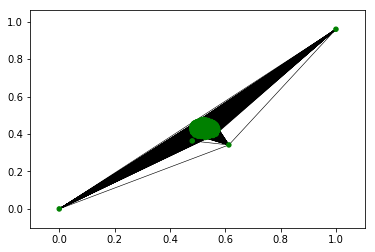

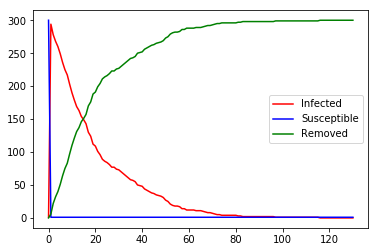

In [111]:
init_fully_connected_network(num_nodes)
infected_, susceptible_, removed_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, removed_)
infecteds.append(infected_)
susceptibles.append(susceptible_)
removeds.append(removed_)

## Random network

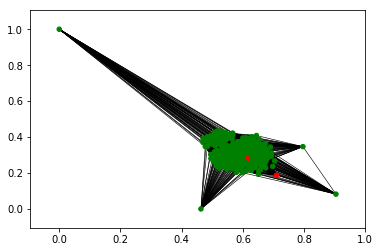

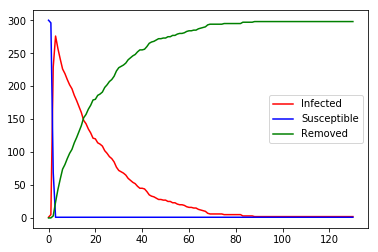

In [112]:
init_random_network(num_nodes, 0.2)
infected_, susceptible_, removed_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, removed_)
infecteds.append(infected_)
susceptibles.append(susceptible_)
removeds.append(removed_)

## Small world network

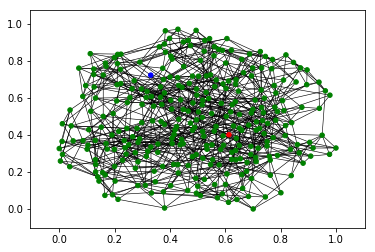

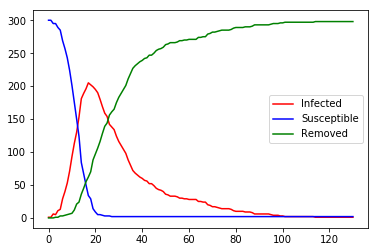

In [113]:
init_small_world(num_nodes, 6, 0.3) # 3 and 0.3
infected_, susceptible_, removed_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, removed_)
infecteds.append(infected_)
susceptibles.append(susceptible_)
removeds.append(removed_)

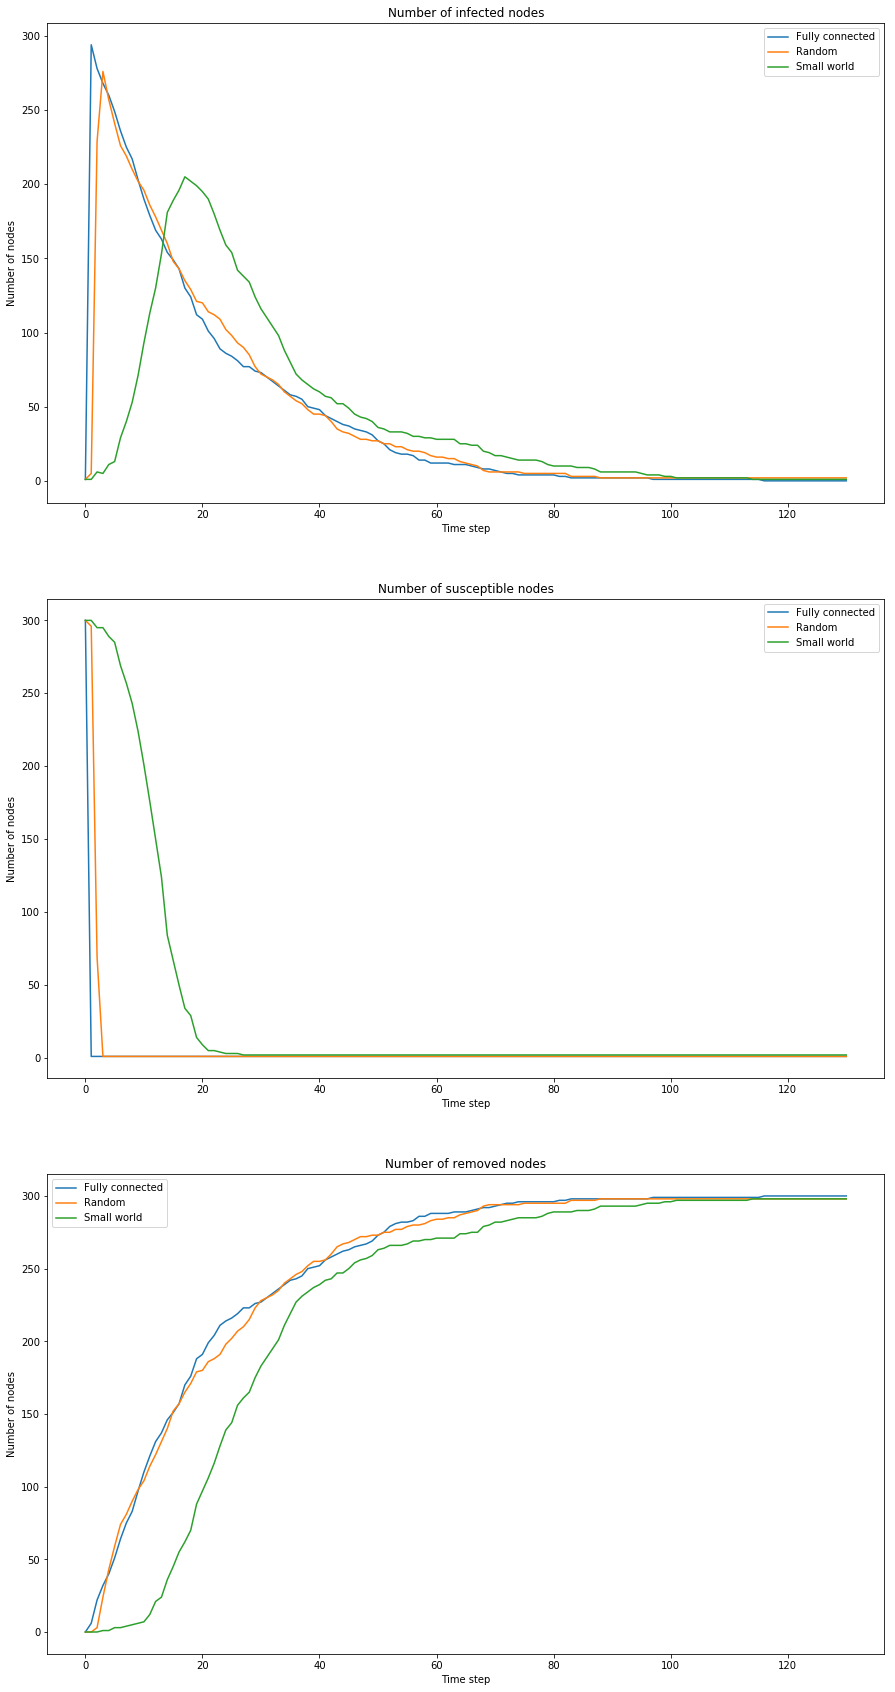

In [114]:
plt.figure(figsize=(15,30))
plt.subplot(3,1,1)
plt.title("Number of infected nodes")
plt.plot(infecteds[0], label="Fully connected")
plt.plot(infecteds[1], label="Random")
plt.plot(infecteds[2], label="Small world")
plt.xlabel("Time step")
plt.ylabel("Number of nodes")
plt.legend()
plt.subplot(3,1,2)
plt.title("Number of susceptible nodes")
plt.plot(susceptibles[0], label="Fully connected")
plt.plot(susceptibles[1], label="Random")
plt.plot(susceptibles[2], label="Small world")
plt.xlabel("Time step")
plt.ylabel("Number of nodes")
plt.legend()
plt.subplot(3,1,3)
plt.title("Number of removed nodes")
plt.plot(removeds[0], label="Fully connected")
plt.plot(removeds[1], label="Random")
plt.plot(removeds[2], label="Small world")
plt.xlabel("Time step")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()

### Observed behaviour for infection probability = 0.1 and removal probability 0.05
#### The infection spredas with similar speed in the random network and fully connected. This makes sense, as randomness helps out with infection spreading. Since nodes are connected to other random nodes, they will infect that "part" of the network. 
#### Interesting observations can be made on the small world network. Here, the infection spreads much slower. This can be explained due to small world networks having only a few links in between the "caves". For a node in new cave to be infected, a "bridge" node in the previous one must get infected first.


### Complex Contagion: Granovetter's Linear Treshold Model (5 points)


Implement Granovetter's Linear Treshold Model. Assume that the thresholds of people are normally distributed. Use you code to explore complex contagion in different network topologies (look at network generators [1]). 
Create at least 3 different network topologies. 
Interpret and discuss your results.


[1] https://networkx.github.io/documentation/development/reference/generators.html


In [11]:
def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"
        g.node[nd]['threshold'] = np.random.normal(0.5, 0.2)
        if RD.random() < 0.2: #initial run
            g.node[nd]['state'] = "infected"

def draw():
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "susceptible":
            colors[nd] = "blue"
        elif g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        else:                       # ?
            colors[nd] = "green"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

def stepGLTM(gs):
    global g
    random_node_id = RD.choice(g.nodes())
    for node in g.nodes():
        if g.node[node]['state'] == "infected":
            continue
        neigh = g.neighbors(node)
        inf_nei = 0
        for nei in neigh:
            if g.node[nei]['state'] == "infected":
                inf_nei+=1
#         print("infected in nei: " + str(inf_nei/len(neigh)))
#         print("neigh " + str(len(neigh)))
#         print(g.node[node]['threshold'])
        if inf_nei/len(neigh) > g.node[node]['threshold']:
            g.node[node]["state"] = "infected"
            gs.infected += 1
            gs.susceptible -= 1
def runGLTM(iterations):
    global g
    gs = GraphState()
    gs.infected = len([n for n in g if g.node[n]['state']=="infected"])
    gs.susceptible = len(g.nodes()) - gs.infected
    num_iter = 0
    infected_ = []
    susceptible_ = []
    while(num_iter<iterations):
        stepGLTM(gs)
        infected_.append(gs.infected)
        susceptible_.append(gs.susceptible)
        num_iter+=1
#         print(len([n for n in g if g.node[n]['state']=="infected"]))
    return infected_, susceptible_    

In [12]:
num_nodes = 1000
num_iters = 30

In [13]:
infs, suscs = [], []

## Fully connected network

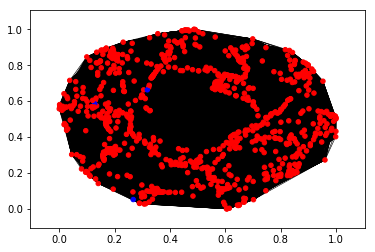

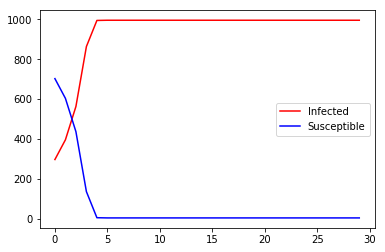

In [14]:
init_fully_connected_network(num_nodes)
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)
infs.append(infected_)
suscs.append(susceptible_)

## Random network

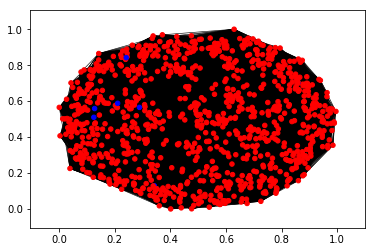

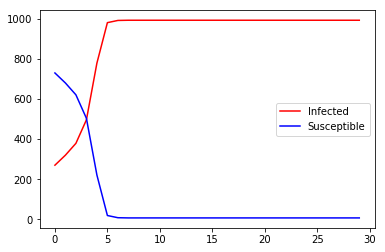

In [15]:
init_random_network(num_nodes, 0.4)
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)
infs.append(infected_)
suscs.append(susceptible_)

## Small world network

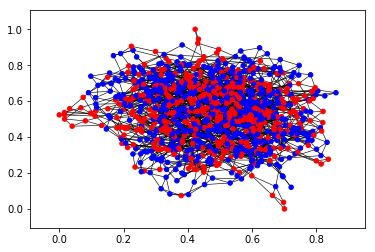

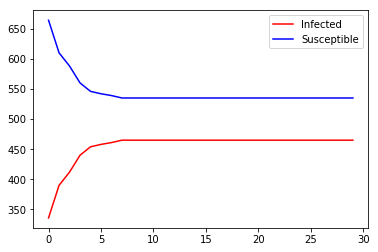

In [16]:
init_small_world(num_nodes, 4, 0.3) # 4 and 0.3
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)
infs.append(infected_)
suscs.append(susceptible_)

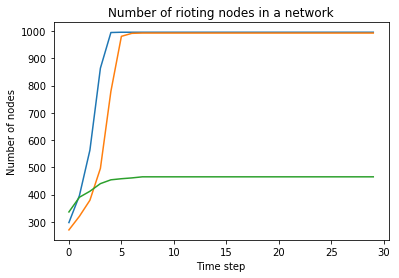

In [17]:
plt.plot(infs[0])
plt.plot(infs[1])
plt.plot(infs[2])
plt.title("Number of rioting nodes in a network")
plt.xlabel("Time step")
plt.ylabel("Number of nodes")
plt.show()

## The number of rioting nodes increases faster in a fully connected network, than a random network. This is probably due to more interaction in the fully connected one.
## Looking at the small world network, it can happen that the riot never spreads completely. This is due to the nature of the model, as a certain number of neighbors is required to change the opinion of an actor. Due to the isolative nature of a small world network, parts of it will never riot, and it will converge fast.

### Axelrod Model (5 points)

Implement Axelrods  model of cultural diffusion.
Create a network and randomly assign a cultural vector to each node.
Implement the dynamic process as describe in: http://www-personal.umich.edu/~axe/research/Dissemination.pdf
Try different number of features and traits per feature.
Make a plot that describes the macro-state of the system (e.g., depict the number of groups that share a culture. At the beginning each node has it's own culture')?


In [46]:
features = []
def init_2d_network(num_f=5, num_t=5):
    global features
    features = list(range(0,num_f))
    traits = [str(f) for f in list(range(0,num_t))]
    global network
    network = NX.grid_2d_graph(10,10)
    for node in network.nodes():
        dummy = ""
        for feature in features:
            dummy+= RD.sample(traits, 1)[0]
        network.node[node]["vector"] = dummy
def init_fully_network(num_f=5, num_t=5):
    global features
    features = list(range(0,num_f))
    traits = [str(f) for f in list(range(0,num_t))]
    global network
    network = NX.random_regular_graph(99,100)
    for node in network.nodes():
        dummy = ""
        for feature in features:
            dummy+= RD.sample(traits, 1)[0]
        network.node[node]["vector"] = dummy
def init_small_w_network(num_f=5, num_t=5):
    global features
    features = list(range(0,num_f))
    traits = [str(f) for f in list(range(0,num_t))]
    global network
    network = NX.watts_strogatz_graph(100, 3, 0.3)
    for node in network.nodes():
        dummy = ""
        for feature in features:
            dummy+= RD.sample(traits, 1)[0]
        network.node[node]["vector"] = dummy

In [47]:
def stepAXM():
    random_node = RD.choice(network.nodes())
    random_neighbour = RD.choice(NX.neighbors(network, random_node))
    similarity = calc_similarity(network.node[random_node]["vector"], network.node[random_neighbour]["vector"])
    if similarity > 0 and similarity < 1:
        feat = choose_dif_feat(network.node[random_node]["vector"], network.node[random_neighbour]["vector"])
        vect = list(network.node[random_neighbour]["vector"])
        vect[feat] = network.node[random_node]["vector"][feat]
        network.node[random_neighbour]["vector"] = "".join(vect)

In [48]:
from difflib import SequenceMatcher
def calc_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()
def choose_dif_feat(a,b):
    while(True):
        feat = RD.choice(features)
        if a[feat] != b[feat]:
            return feat

In [49]:
def count_unique_cultures():
    cultures = set()
    for node in network.nodes(): 
        if network.node[node]["vector"] not in cultures:
            cultures.add(network.node[node]["vector"])
    return len(cultures)

In [50]:
def runAXM(iterations,num_f=5, num_t=5):
    uniq_cul = []
    for i in range(0,iterations):
        stepAXM()
        uniq_cul.append(count_unique_cultures())
    return uniq_cul

## Axelrod model

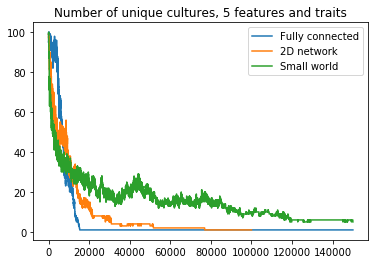

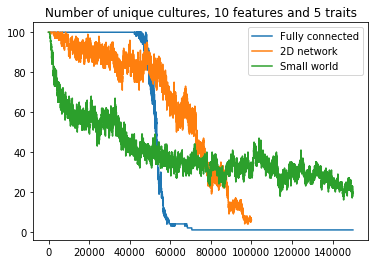

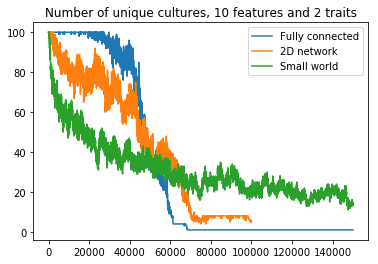

In [51]:
uniq_cults = []
init_fully_network(5,5)
uniq_cul = runAXM(150000, 5, 5)
uniq_cults.append(uniq_cul)
init_2d_network()
uniq_cul = runAXM(100000, 5, 5)
uniq_cults.append(uniq_cul)
init_small_w_network()
uniq_cul = runAXM(150000, 5, 5)
uniq_cults.append(uniq_cul)
plt.plot(uniq_cults[0], label="Fully connected")
plt.plot(uniq_cults[1], label="2D network")
plt.plot(uniq_cults[2], label="Small world")
plt.title("Number of unique cultures, 5 features and traits")
plt.legend()
plt.show()
uniq_cults = []
init_fully_network(20,5)
uniq_cul = runAXM(150000, 20, 5)
uniq_cults.append(uniq_cul)
init_2d_network(20,5)
uniq_cul = runAXM(100000, 20, 5)
uniq_cults.append(uniq_cul)
init_small_w_network(20,5)
uniq_cul = runAXM(150000, 20, 5)
uniq_cults.append(uniq_cul)
plt.plot(uniq_cults[0], label="Fully connected")
plt.plot(uniq_cults[1], label="2D network")
plt.plot(uniq_cults[2], label="Small world")
plt.title("Number of unique cultures, 10 features and 5 traits")
plt.legend()
plt.show()
uniq_cults = []
init_fully_network(20, 2)
uniq_cul = runAXM(150000, 20, 2)
uniq_cults.append(uniq_cul)
init_2d_network(20, 2)
uniq_cul = runAXM(100000, 20, 2)
uniq_cults.append(uniq_cul)
init_small_w_network(20, 2)
uniq_cul = runAXM(150000, 20, 2)
uniq_cults.append(uniq_cul)
plt.plot(uniq_cults[0], label="Fully connected")
plt.plot(uniq_cults[1], label="2D network")
plt.plot(uniq_cults[2], label="Small world")
plt.title("Number of unique cultures, 10 features and 2 traits")
plt.legend()
plt.show()

### Difference in network topology:
#### We observe that the fully connected network converges the fastest. The 2d network is next, while the small world is slowest(and never converges). This can be explained by the variety of interactions in a network. The fully connected one has an advantage here, as an interaction can happen between any 2 nodes.

### Difference in number of features and traits
#### Increasing the number of features, and keeping the number of traits the same has the same effect on all the network topologies: they all converge slower.
#### Changing the number of traits, with the features constant makes the number of unique cultures converge faster, but only by a small margin.
#### This is in line with the theory presented in the paper